# IMPORTING LIBRARIES

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Getting Data

In [3]:
df = pd.read_csv("Customer Churn.csv")

In [4]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [5]:
df.tail()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.21,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.32,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.64,0
3149,8,1,11,2,1792,25,7,9,3,1,1,30,100.68,1


### Analysing the data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [70]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [8]:
cor = df.corr()
cor

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
Call Failure,1.000000,0.152879,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.050406,0.192285,-0.114645,0.041758,0.121225,-0.008987
Complains,0.152879,1.000000,-0.020286,-0.033948,-0.104952,-0.090774,-0.111633,-0.058199,0.019976,0.001140,0.271405,0.003298,-0.132895,0.532053
Subscription Length,0.169737,-0.020286,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,0.021453,-0.159680,0.142841,-0.002430,0.109565,-0.032588
Charge Amount,0.589028,-0.033948,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.279679,0.324232,-0.356269,0.278955,0.169428,-0.202305
Seconds of Use,0.501607,-0.104952,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020060,0.133593,-0.460618,0.020843,0.415087,-0.298935
Frequency of use,0.573349,-0.090774,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.032544,0.206452,-0.454752,-0.028350,0.401572,-0.303337
Frequency of SMS,-0.022282,-0.111633,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.053719,0.195686,-0.296164,-0.092798,0.924877,-0.220754
Distinct Called Numbers,0.504058,-0.058199,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.020941,0.172079,-0.413039,0.051037,0.284807,-0.278867
Age Group,0.050406,0.019976,0.021453,0.279679,0.020060,-0.032544,-0.053719,0.020941,1.000000,-0.150593,0.002506,0.960758,-0.183481,-0.014550
Tariff Plan,0.192285,0.001140,-0.159680,0.324232,0.133593,0.206452,0.195686,0.172079,-0.150593,1.000000,-0.164143,-0.119426,0.252298,-0.105853


In [9]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [10]:
df['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

In [11]:
df['Complains'].value_counts()

0    2909
1     241
Name: Complains, dtype: int64

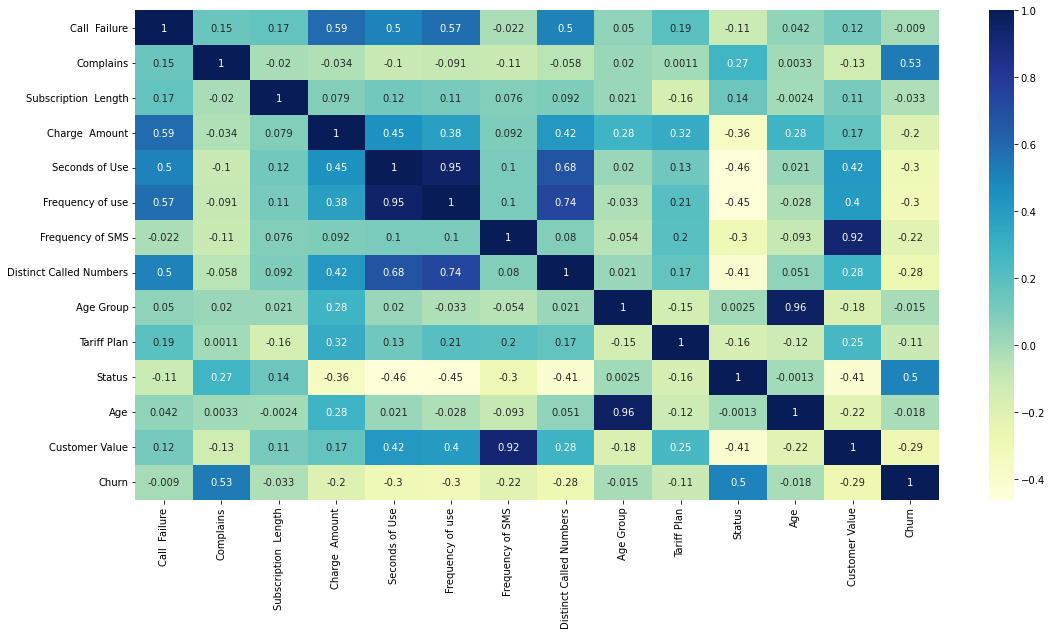

In [12]:
plt.figure(figsize=(18,9))
sns.heatmap(cor,cmap='YlGnBu',annot = True)
plt.show()

## Splitting Data

In [13]:
X = df.iloc[:,:-1]
X

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640


In [15]:
y = df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
3145    0
3146    0
3147    0
3148    0
3149    1
Name: Churn, Length: 3150, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [34]:
X_train

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
3082,5,0,38,2,643,10,11,4,5,1,1,55,26.295
1454,0,0,33,0,1908,44,0,26,1,1,1,15,107.360
1498,0,0,4,0,3905,26,197,3,3,1,1,30,945.240
2561,18,0,40,0,3143,70,36,34,3,1,2,30,272.520
549,0,1,9,0,888,9,0,3,3,1,1,30,35.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,15,0,27,1,1530,38,26,15,2,1,1,25,187.560
1095,11,0,15,0,6088,135,78,40,1,2,1,15,771.265
1130,1,0,33,1,6540,94,12,22,4,1,1,45,195.850
1294,0,0,12,0,1310,18,11,8,2,1,1,25,109.260


In [35]:
len(X_train)

2205

In [36]:
X_test

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
2965,14,0,40,3,7515,103,201,28,3,1,1,30,1108.720
969,3,0,37,0,7508,127,384,43,2,1,1,25,2071.575
1385,0,0,28,0,3153,66,0,20,2,1,1,25,144.855
1233,21,0,33,3,15850,234,3,82,2,1,1,25,737.280
2996,23,0,18,2,9947,188,88,42,5,1,1,55,284.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,0,9,1,4200,39,206,7,3,1,1,30,993.560
1192,2,0,21,0,860,23,7,9,2,1,1,25,71.235
662,27,0,38,3,15330,226,63,35,3,1,1,30,874.240
480,7,0,33,3,7385,107,35,37,5,1,1,55,164.880


In [37]:
y_train

3082    0
1454    0
1498    0
2561    0
549     1
       ..
3092    0
1095    0
1130    0
1294    0
860     0
Name: Churn, Length: 2205, dtype: int64

In [32]:
len(y_train)

945

In [38]:
y_test

2965    0
969     0
1385    0
1233    0
2996    0
       ..
748     0
1192    0
662     0
480     0
803     0
Name: Churn, Length: 945, dtype: int64

In [39]:
len(y_test)

945

# Standarization of data

In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [41]:
scale.fit_transform(X_train,y_train)

array([[-0.35134505, -0.28253089,  0.64326373, ..., -0.56181176,
         2.72266708, -0.85938629],
       [-1.04293212, -0.28253089,  0.06166765, ..., -0.56181176,
        -1.80313835, -0.70525481],
       [-1.04293212, -0.28253089, -3.31158965, ..., -0.56181176,
        -0.10596132,  0.88783327],
       ...,
       [-0.90461471, -0.28253089,  0.06166765, ..., -0.56181176,
         1.59121572, -0.53700594],
       [-1.04293212, -0.28253089, -2.38103591, ..., -0.56181176,
        -0.671687  , -0.70164228],
       [ 0.61687685, -0.28253089,  0.75958295, ..., -0.56181176,
        -0.10596132, -0.2831591 ]])

In [43]:
scale.transform(X_test)

array([[ 0.89351168, -0.28253089,  0.87590217, ..., -0.56181176,
        -0.10596132,  1.19866303],
       [-0.62797988, -0.28253089,  0.52694452, ..., -0.56181176,
        -0.671687  ,  3.02937009],
       [-1.04293212, -0.28253089, -0.51992844, ..., -0.56181176,
        -0.671687  , -0.63396437],
       ...,
       [ 2.69163807, -0.28253089,  0.64326373, ..., -0.56181176,
        -0.10596132,  0.7528387 ],
       [-0.07471022, -0.28253089,  0.06166765, ..., -0.56181176,
         2.72266708, -0.5958902 ],
       [ 0.61687685, -0.28253089,  1.22485982, ..., -0.56181176,
        -1.80313835, -0.36873806]])

In [54]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [55]:
ms.fit_transform(X_train,y_train)

array([[0.13888889, 0.        , 0.79545455, ..., 0.        , 1.        ,
        0.01223683],
       [0.        , 0.        , 0.68181818, ..., 0.        , 0.        ,
        0.04996184],
       [0.        , 0.        , 0.02272727, ..., 0.        , 0.375     ,
        0.43988384],
       ...,
       [0.02777778, 0.        , 0.68181818, ..., 0.        , 0.75      ,
        0.0911422 ],
       [0.        , 0.        , 0.20454545, ..., 0.        , 0.25      ,
        0.05084604],
       [0.33333333, 0.        , 0.81818182, ..., 0.        , 0.375     ,
        0.15327339]])

In [56]:
ms.transform(X_test)

array([[0.38888889, 0.        , 0.84090909, ..., 0.        , 0.375     ,
        0.5159621 ],
       [0.08333333, 0.        , 0.77272727, ..., 0.        , 0.25      ,
        0.96404339],
       [0.        , 0.        , 0.56818182, ..., 0.        , 0.25      ,
        0.06741079],
       ...,
       [0.75      , 0.        , 0.79545455, ..., 0.        , 0.375     ,
        0.40684276],
       [0.19444444, 0.        , 0.68181818, ..., 0.        , 1.        ,
        0.07672977],
       [0.33333333, 0.        , 0.90909091, ..., 0.        , 0.        ,
        0.13232721]])

# Implementing LinearRegression

In [47]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [51]:
reg.fit(X_test,y_test)

LinearRegression()

In [52]:
print(reg.coef_)

[ 7.25413306e-03  5.18550746e-01 -3.48088423e-03 -2.23395529e-02
  1.60087601e-05 -2.36102000e-03 -4.77527756e-04 -1.65663762e-04
 -2.48817995e-03 -2.31120813e-02  2.59982726e-01  5.90405011e-04
  6.87497473e-05]


In [53]:
print(reg.intercept_)

-0.01202708707024322


In [57]:
rp = reg.predict(X_test)
rp

array([-1.68816698e-02, -1.00132707e-01,  3.84563341e-02, -5.79927523e-02,
       -9.70132569e-03,  3.17543716e-02,  1.22149418e-01,  6.35437729e-02,
        1.57802038e-01,  3.79407450e-01,  4.96850710e-02,  6.51670491e-02,
       -7.32460276e-04,  5.43427677e-02,  3.47671331e-01,  8.16173184e-02,
        6.58999152e-01,  4.30546684e-01, -7.59703599e-03,  1.21579333e-01,
       -3.22679236e-03,  1.30827117e-01,  1.24278451e-01,  8.24313132e-02,
        3.80495673e-01,  3.79740869e-01,  3.85877979e-01,  6.33984311e-01,
        3.34821638e-01,  3.62336448e-01,  3.53653307e-01, -6.61577699e-02,
        4.20281871e-02,  4.99962189e-02, -9.92725742e-03, -6.00149494e-03,
        3.54635921e-01,  2.84981768e-01,  8.67686390e-02,  1.61997426e-02,
        3.04674704e-01,  6.07567762e-02,  7.66040382e-03,  3.58581898e-01,
        5.58536558e-02, -2.21103794e-02, -1.58313798e-02, -1.07197187e-01,
       -2.17839926e-03,  2.67074440e-02,  1.17147074e-02,  2.16257781e-02,
       -6.11962743e-02, -

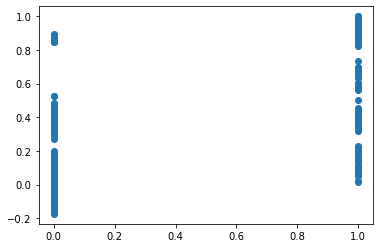

In [58]:
plt.scatter(y_test,rp)

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,rp))
print(mean_squared_error(y_test,rp))
print(np.sqrt(mean_squared_error(y_test,rp)))

0.1788695516221727
0.08135165733323996
0.2852221192916846


# Implementing Logistic Regression

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [81]:
lg.fit(X_test,y_test)

LogisticRegression()

In [83]:
X_train_pred = lg.predict(X_train)
train_accuracy = accuracy_score(y_train,X_train_pred)
print(train_accuracy)

0.8598639455782313


In [86]:
y_pred = lg.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
print(test_accuracy)

0.8328042328042328


In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[762,  21],
       [137,  25]], dtype=int64)